   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

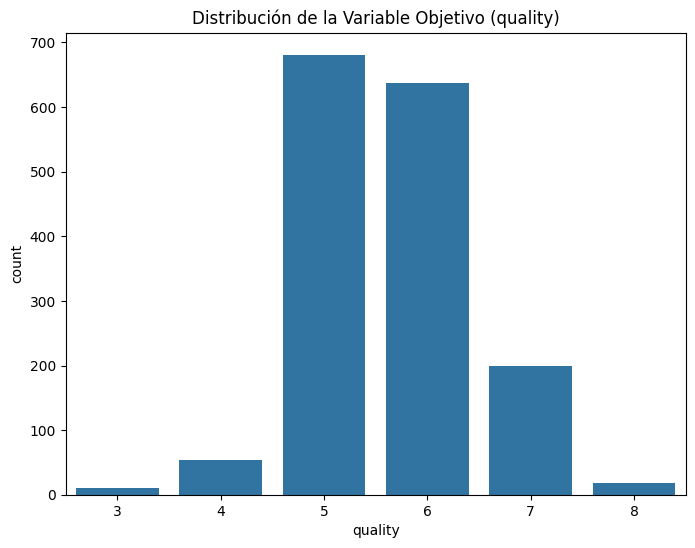

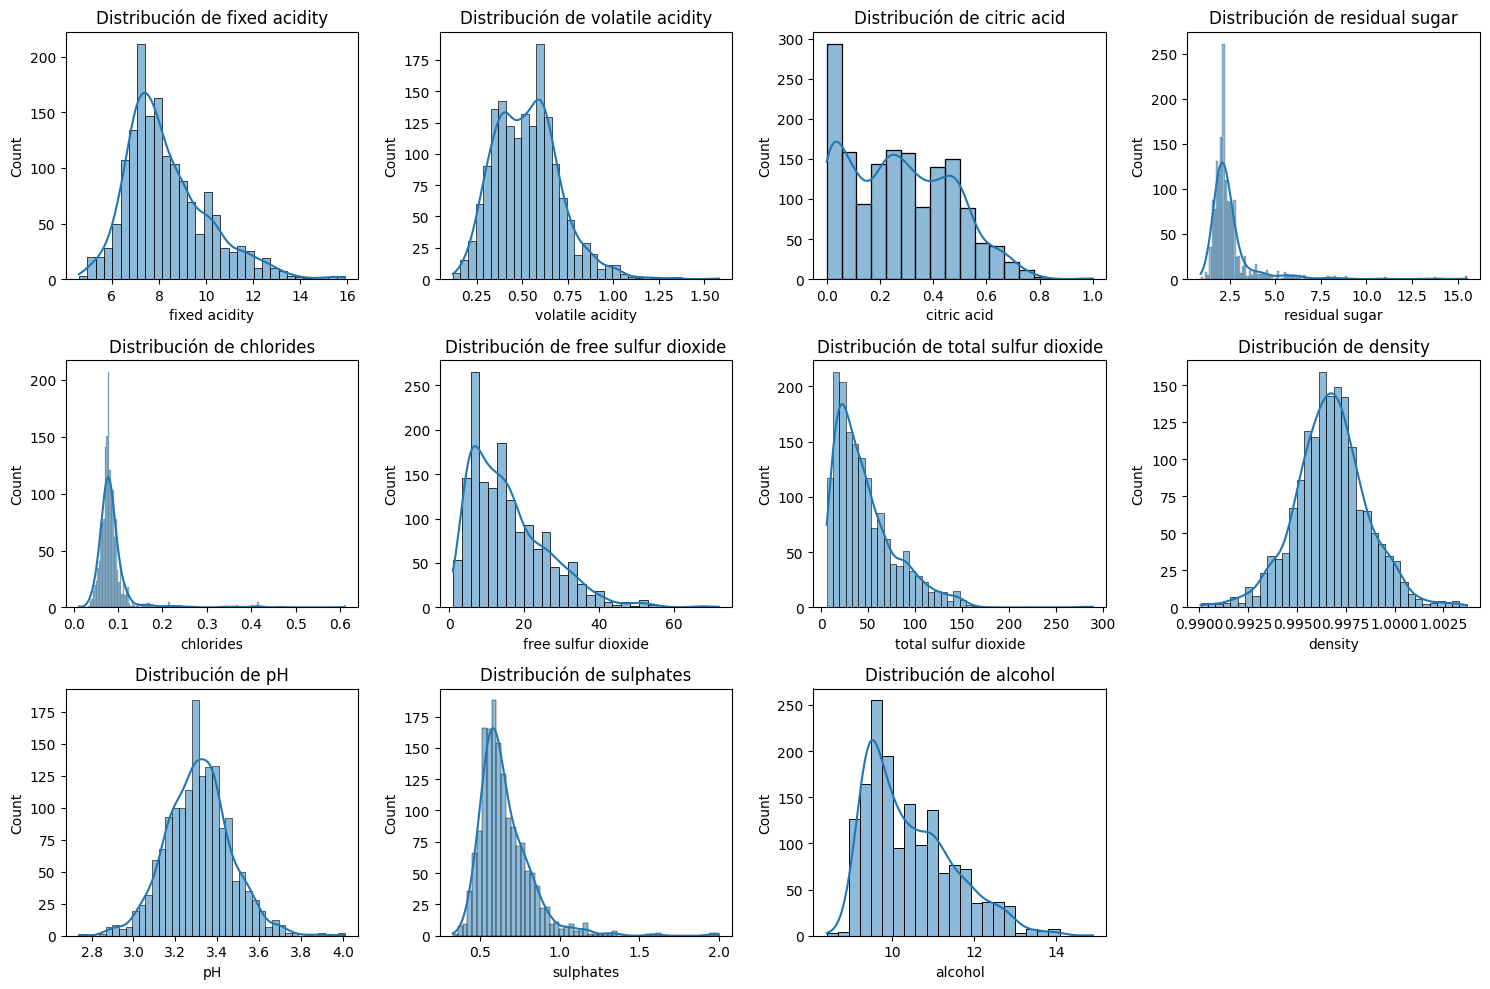

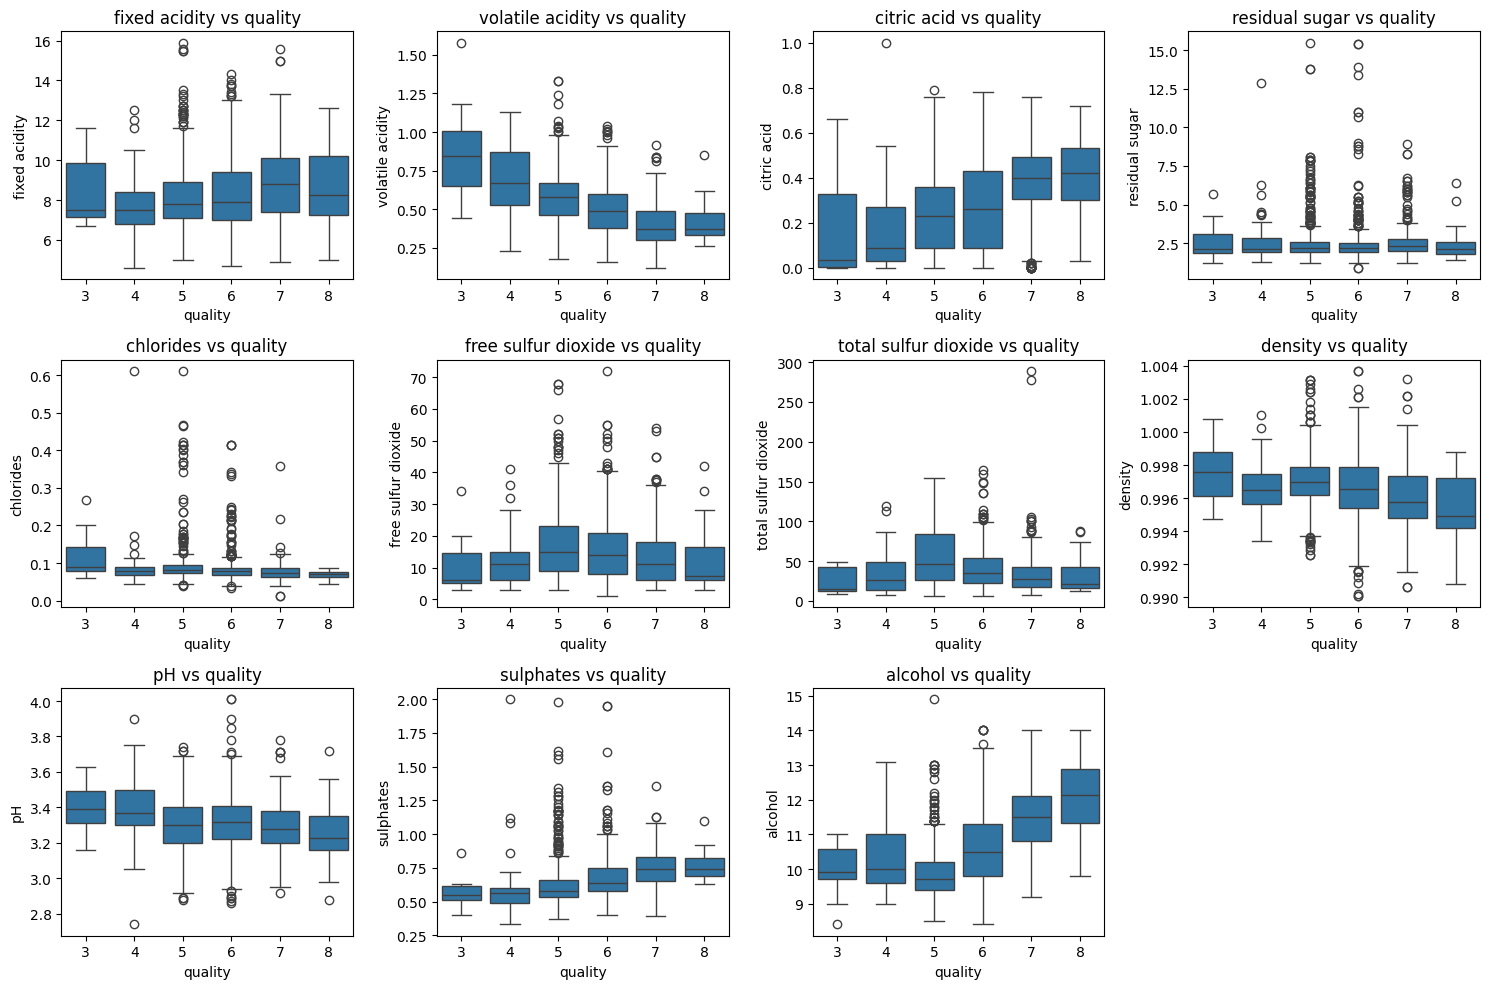

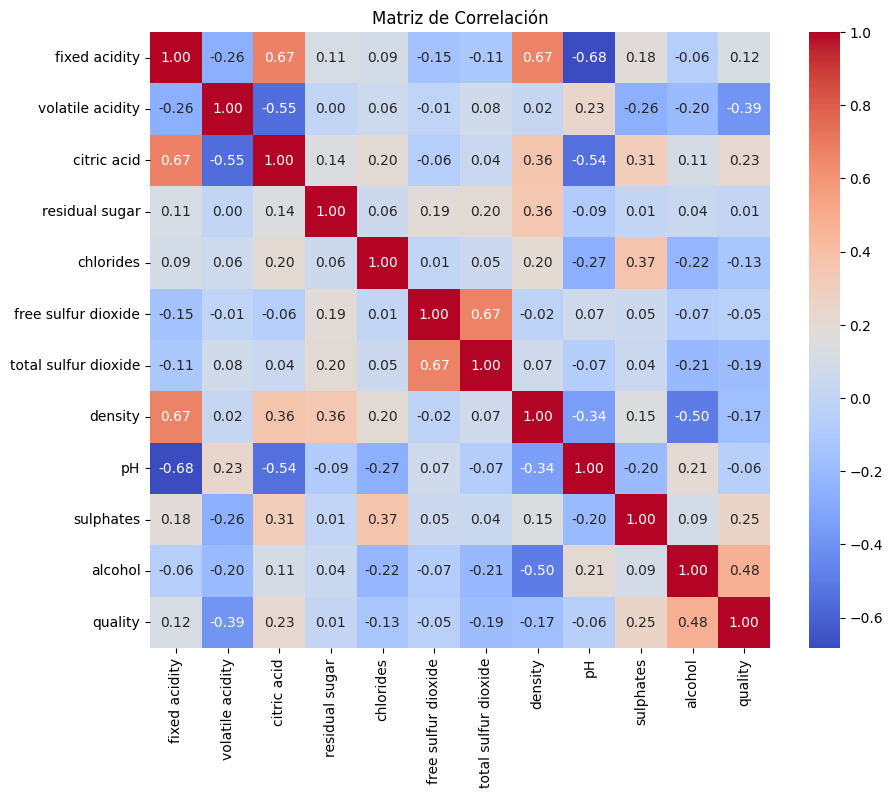

Primeras filas del DataFrame preprocesado:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('../data/decision_tree_data.csv')

# Mostrar las primeras filas del dataset
print(df.head())

# Obtener información general del dataset
print(df.info())

# Calcular estadísticas descriptivas
print(df.describe())

print(df.isnull().sum())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='quality')
plt.title('Distribución de la Variable Objetivo (quality)')
plt.show()

features = df.columns[:-1]  # Todas las columnas excepto 'quality'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribución de {feature}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x='quality', y=feature)
    plt.title(f'{feature} vs quality')
plt.tight_layout()
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

from sklearn.preprocessing import StandardScaler

# Crear una copia del DataFrame para no modificar el original
df_preprocessed = df.copy()

# Crear la nueva variable binaria 'quality_binary'
df_preprocessed['quality_binary'] = (df_preprocessed['quality'] >= 7).astype(int)

# Eliminar la columna 'quality' original
df_preprocessed.drop('quality', axis=1, inplace=True)

# Escalar las variables numéricas
numerical_features = df_preprocessed.columns[:-1]  # Todas las columnas excepto 'quality_binary'
scaler = StandardScaler()
df_preprocessed[numerical_features] = scaler.fit_transform(df_preprocessed[numerical_features])

# Mostrar las primeras filas del DataFrame preprocesado
print("Primeras filas del DataFrame preprocesado:")
print(df_preprocessed.head())

# Verificar la información del DataFrame preprocesado
print("\nInformación del DataFrame preprocesado:")
print(df_preprocessed.info())

from sklearn.feature_selection import SelectKBest, f_classif

# Separar las características (X) y la variable objetivo (y)
X = df_preprocessed.drop('quality_binary', axis=1)
y = df_preprocessed['quality_binary']

# Aplicar SelectKBest para seleccionar las mejores k características
# Vamos a empezar seleccionando las top 5 características (este número se puede ajustar)
num_features_to_select = 5
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_selected = selector.fit_transform(X, y)

# Obtener las columnas seleccionadas
selected_feature_indices = selector.get_support()
selected_features = X.columns[selected_feature_indices]

print("Características seleccionadas por SelectKBest:")
print(selected_features)

# Crear un nuevo DataFrame con solo las características seleccionadas y la variable objetivo
df_selected = df_preprocessed[selected_features].copy()
df_selected['quality_binary'] = y

print("\nPrimeras filas del DataFrame con características seleccionadas:")
print(df_selected.head())

from sklearn.feature_selection import SelectKBest, f_classif

# Separar las características (X) y la variable objetivo (y)
X = df_preprocessed.drop('quality_binary', axis=1)
y = df_preprocessed['quality_binary']

# Aplicar SelectKBest para seleccionar las mejores k características
# Vamos a empezar seleccionando las top 5 características (este número se puede ajustar)
num_features_to_select = 5
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_selected = selector.fit_transform(X, y)

# Obtener las columnas seleccionadas
selected_feature_indices = selector.get_support()
selected_features = X.columns[selected_feature_indices]

print("Características seleccionadas por SelectKBest:")
print(selected_features)

# Crear un nuevo DataFrame con solo las características seleccionadas y la variable objetivo
df_selected = df_preprocessed[selected_features].copy()
df_selected['quality_binary'] = y

print("\nPrimeras filas del DataFrame con características seleccionadas:")
print(df_selected.head())

from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_selected.drop('quality_binary', axis=1)
y = df_selected['quality_binary']

# Dividir el dataset en conjuntos de entrenamiento y prueba
# Usaremos un 80% para entrenamiento y un 20% para prueba
# random_state=42 asegura reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento (X_train):", X_train.shape)
print("Tamaño del conjunto de prueba (X_test):", X_test.shape)
print("Tamaño del conjunto de entrenamiento (y_train):", y_train.shape)
print("Tamaño del conjunto de prueba (y_test):", y_test.shape)